<a href="https://colab.research.google.com/github/yamil-abraham/facial-emotion-detection/blob/main/facial_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Train a deep learning model using FER-2013 dataset on facial emotion detection

# Dataset from : https://www.kaggle.com/datasets/msambare/fer2013

In [2]:
 # Unzip dataset
!unzip FER-2013/FER-2013.zip -d FER-2013/

Streaming output truncated to the last 5000 lines.
  inflating: FER-2013/train/sad/Training_65242339.jpg  
  inflating: FER-2013/train/sad/Training_65267116.jpg  
  inflating: FER-2013/train/sad/Training_65275626.jpg  
  inflating: FER-2013/train/sad/Training_6529266.jpg  
  inflating: FER-2013/train/sad/Training_65329617.jpg  
  inflating: FER-2013/train/sad/Training_65338712.jpg  
  inflating: FER-2013/train/sad/Training_65338797.jpg  
  inflating: FER-2013/train/sad/Training_65387162.jpg  
  inflating: FER-2013/train/sad/Training_65404494.jpg  
  inflating: FER-2013/train/sad/Training_65426218.jpg  
  inflating: FER-2013/train/sad/Training_65430136.jpg  
  inflating: FER-2013/train/sad/Training_65437377.jpg  
  inflating: FER-2013/train/sad/Training_6545735.jpg  
  inflating: FER-2013/train/sad/Training_65463385.jpg  
  inflating: FER-2013/train/sad/Training_65473985.jpg  
  inflating: FER-2013/train/sad/Training_65502829.jpg  
  inflating: FER-2013/train/sad/Training_65505359.jpg  

In [3]:
# Delete zip file
!rm -rf FER-2013/FER-2013.zip

In [4]:
# Create a dataset directory and move files
!mkdir dataset
!cp -r FER-2013 dataset/FER-2013

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


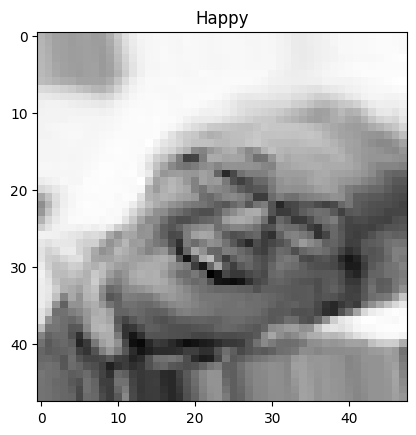

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [5]:
# Data augmentation | Create dataset generator
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

IMG_HEIGHT=48
IMG_WIDTH=48
batch_size=32

train_data_dir='/content/dataset/FER-2013/train'
validation_data_dir='/content/dataset/FER-2013/test'

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

# Verify the generator by plotting a few faces and printing corresponding labels
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
l = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(l)
plt.show()
##########################################################


###########################################################
# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display summary
print(model.summary())


train_path = "/content/dataset/FER-2013/train"
test_path = "/content/dataset/FER-2013/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


epochs=50

# Train the model
history=model.fit(train_generator,
                steps_per_epoch = num_train_imgs//batch_size,
                epochs = epochs,
                validation_data = validation_generator,
                validation_steps = num_test_imgs//batch_size)

In [6]:
# Save the trained model
model.save('emotion_detection_model_50epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


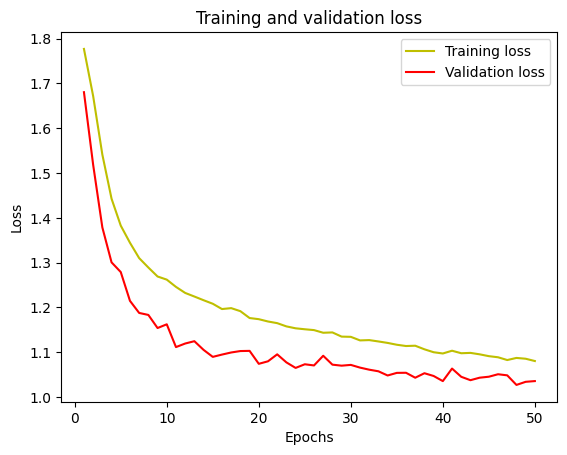

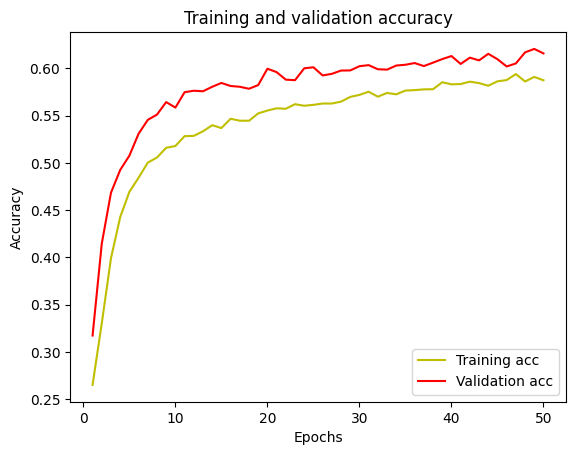

In [7]:
# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 114ms/step
Accuracy =  0.65625


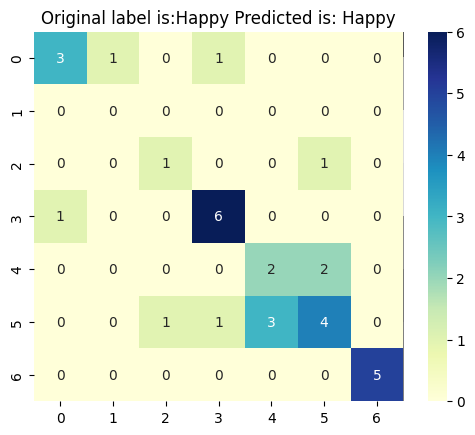

In [8]:
####################################################################
from keras.models import load_model


# Test the model
my_model = load_model('emotion_detection_model_50epochs.h5', compile=False)

# Generate a batch of images
test_img, test_label = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_label, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

# Confusion Matrix - Verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
# print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True, cmap="YlGnBu")

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
# Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_label = class_labels[test_labels[n]]
pred_label = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_label+" Predicted is: "+ pred_label)
plt.show()

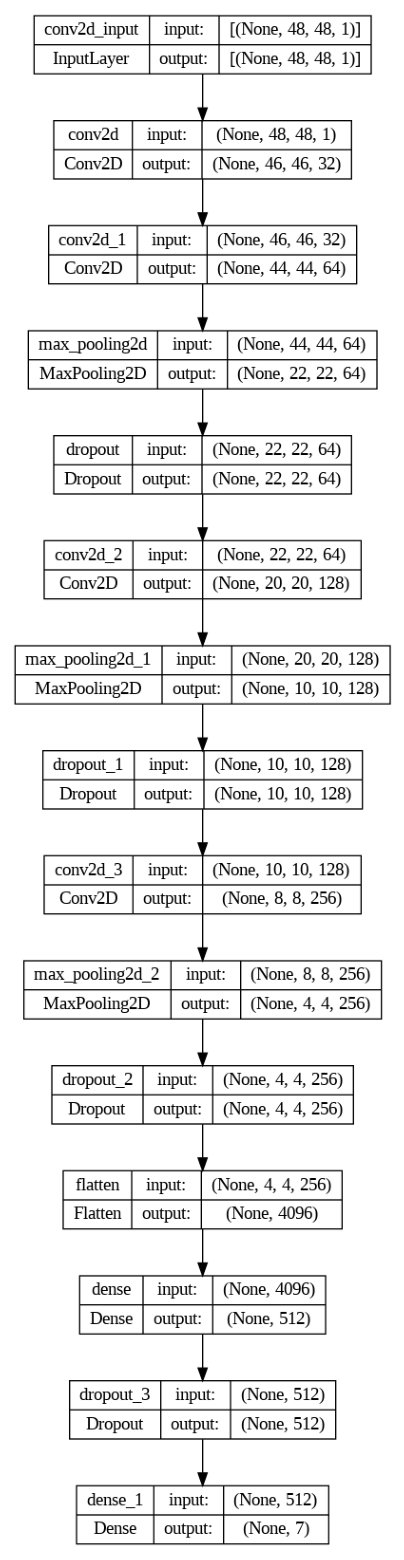

In [12]:
# Print the model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

model_img = plt.imread('model_plot.png')
plt.figure(figsize=(35, 20))
plt.imshow(model_img)
plt.axis('off')
plt.show()


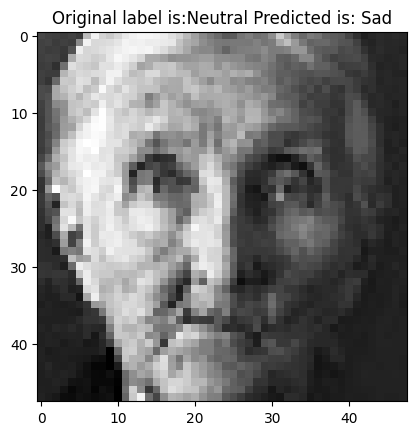

In [19]:
# Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_label = class_labels[test_labels[n]]
pred_label = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_label+" Predicted is: "+ pred_label)
plt.show()